In [1]:
import pandas as pd
import numpy as np
from skimage import io
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score as CHS
import matplotlib.pyplot as plt

In [74]:
def create_color_map(y_pred, n_clusters):
# Assuming you have a 2D array representing the land and water values
    data = y_pred.reshape(w, h)

    # Define colors for land and water
    land_color = [110, 38, 14]  # Green
    water_color = [0, 0, 255]  # Blue
    cluster_3_color = [51, 204, 51]
    cluster_4_color = [255, 204, 0]

    # Create an empty RGB image
    height, width = data.shape
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Create a mask based on land and water values
    land_mask = (data == 0)
    water_mask = (data == 1)

    if n_clusters == 3:
        cluster_3_mask = (data == 2)
    if n_clusters == 4:
        cluster_3_mask = (data == 2)
        cluster_4_mask = (data == 3)

    # Assign colors to the corresponding pixels in the RGB image
    rgb_image[land_mask] = land_color
    rgb_image[water_mask] = water_color

    if n_clusters == 3:
        rgb_image[cluster_3_mask] = cluster_3_color
    if n_clusters == 4:
        rgb_image[cluster_3_mask] = cluster_3_color
        rgb_image[cluster_4_mask] = cluster_4_color

    # Display the result using matplotlib
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

In [2]:
IMG_PATH = "data/yukon.tif"

In [69]:
img = io.imread(IMG_PATH)
w, h, ch = img.shape
img_reshaped = img.reshape(w * h, ch)

In [77]:
kmc = KMeans(2)

In [78]:
y_pred_kmc = kmc.fit_predict(img_reshaped)

/Users/wojpon/.pyenv/versions/3.11.0/envs/mfaasi/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
gmm = GaussianMixture(2)

In [80]:
y_pred_gmm = gmm.fit_predict(img_reshaped)

### 2 clusters

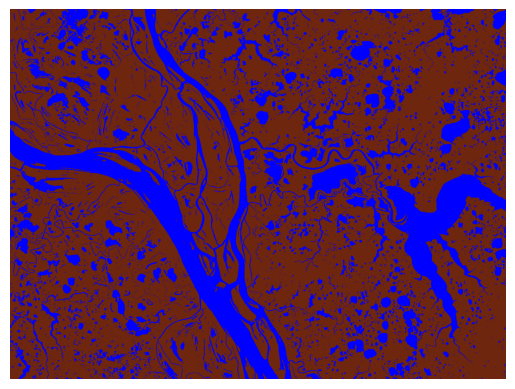

In [81]:
create_color_map(y_pred_kmc, 2)

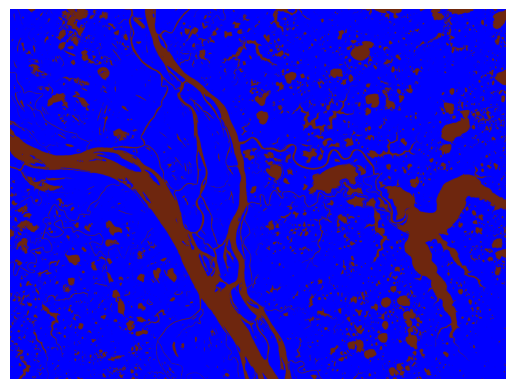

In [82]:
create_color_map(y_pred_gmm, 2)

### 3 clusters

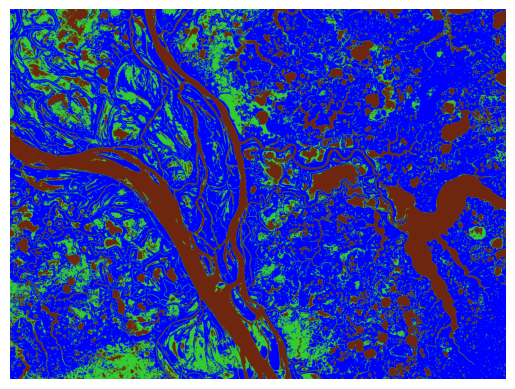

In [75]:
create_color_map(y_pred_kmc, 3)

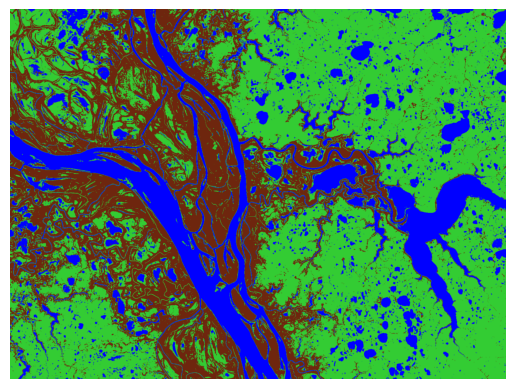

In [76]:
create_color_map(y_pred_gmm, 3)

### 4 clusters

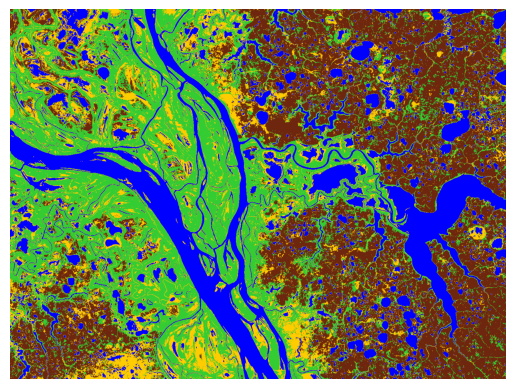

In [65]:
create_color_map(y_pred_kmc, 4)

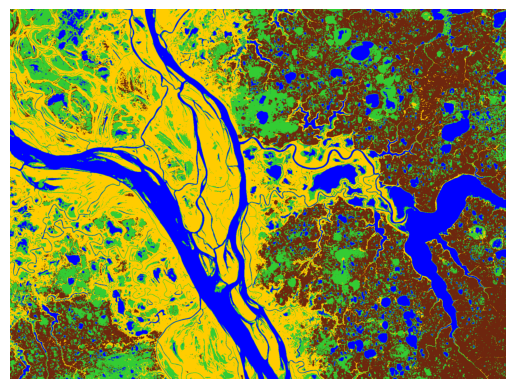

In [66]:
create_color_map(y_pred_gmm, 4)